In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/speech-emotion-dataset/features.csv


In [51]:
df = pd.read_csv('/kaggle/input/speech-emotion-dataset/features.csv')

# Emotions in the RAVDESS dataset
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

labels_map = {
    'male_calm': 2, 
    'male_angry': 5, 
    'male_fear': 6,
    'male_neutral': 1,
    'male_sad': 4,
    'male_happy': 3,
    'male_surprise': 8,
    'male_disgust': 7,
    'female_calm': 2,
    'female_angry': 5,
    'female_happy': 3,
    'female_neutral': 1,
    'female_sad': 4,
    'female_surprise': 8,
    'female_disgust': 7,
    'female_fear': 6,    
}

df['label_numeric'] = df['labels'].map(labels_map)
# filter
df = df.loc[df['label_numeric'].isin([1,3,5])].copy()
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,labels,label_numeric
3,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,male_angry,5
4,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,male_angry,5
5,-331.021576,39.745705,-22.860626,6.353040,-16.374424,-11.440884,-17.602816,-9.509995,-27.061333,-6.779751,...,-3.978928,-8.940723,-9.396315,-3.595846,-16.388462,1.839664,-6.579001,-1.339286,male_angry,5
9,-644.859009,69.573090,2.603384,16.992235,7.469007,2.995506,-2.625710,-7.836775,-13.316399,-4.526955,...,-0.242245,-3.906938,-2.942741,1.678185,-6.506072,-2.595646,-0.604484,-0.405804,male_neutral,1
10,-491.505059,37.069875,8.698377,11.960729,3.882133,1.037258,-1.985268,-9.287605,-9.993058,-4.932854,...,-1.021602,-3.161323,-1.960503,0.334933,-5.266377,-3.202918,0.464814,-2.567416,male_neutral,1


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

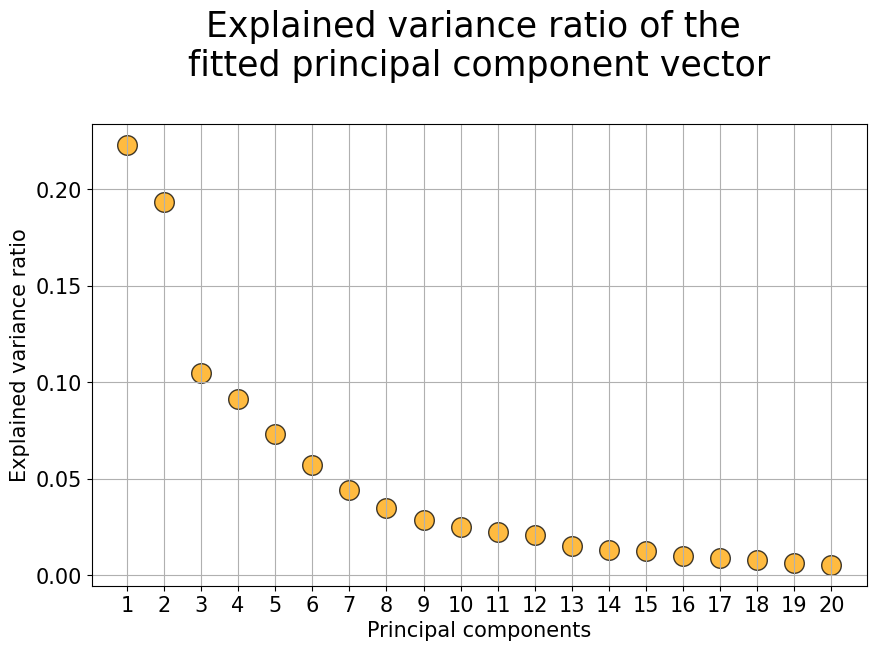

In [53]:
scaler = StandardScaler()
X = df.drop('labels', axis=1)
X = X.drop('label_numeric', axis=1)
y = df['labels']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[:-2])

pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

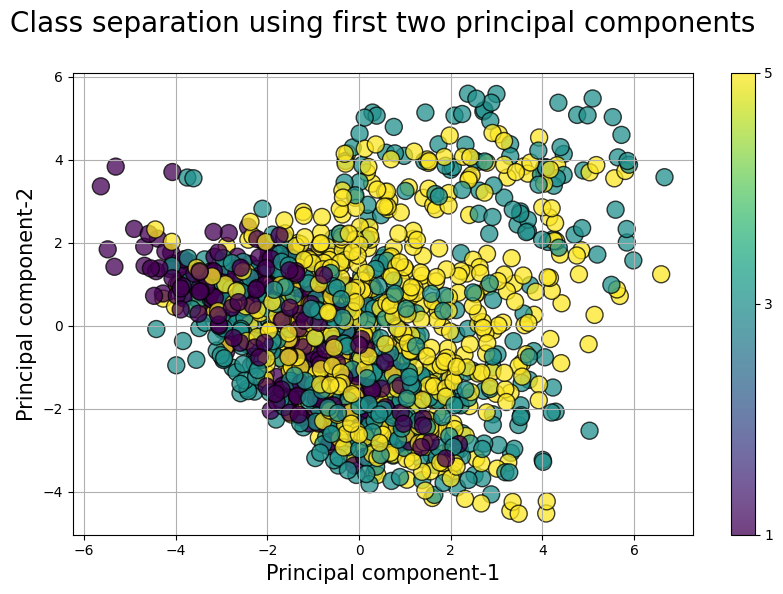

In [54]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
scatter = plt.scatter(dfx_trans[0],dfx_trans[1],c=df['label_numeric'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.colorbar(scatter, ticks=df['label_numeric'].unique())
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()